In [44]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")

%run HelperFunctions.ipynb

df_train = pd.read_csv('../HousePricePrediction/train.csv')
df_test = pd.read_csv('../HousePricePrediction/test.csv')
df_train.set_index('Id', inplace=True)
df_test.set_index('Id', inplace=True)

df = pd.concat([df_train, df_test]).reset_index(drop=True)

prices = df[["SalePrice"]]
pd.options.display.max_seq_items = 3000
pd.set_option('display.max_columns', None)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [45]:
print(df_train.shape)
print(df_test.shape)
print(df.shape)

(1460, 80)
(1459, 79)
(2919, 80)


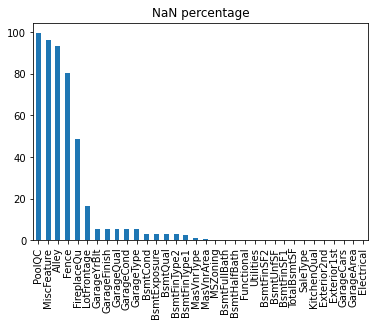

In [46]:
df['MSSubClass'] = df['MSSubClass'].apply(str)
showNanPercentage(df)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [48]:
df = handle_null(df)
df.drop('SalePrice', axis=1).isnull().sum().sum() #Only SalePrice column has NaN

0

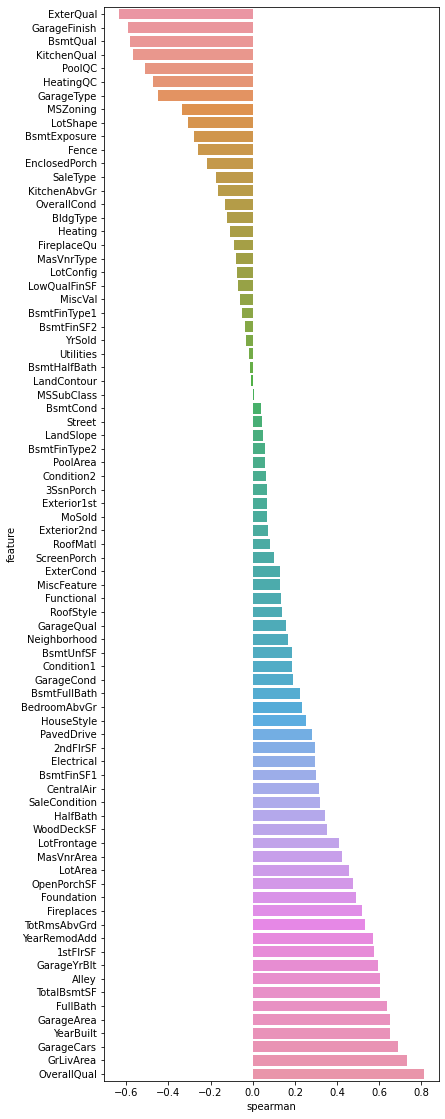

In [49]:
show_corr(df_train, df_train.drop('SalePrice', axis=1).columns)

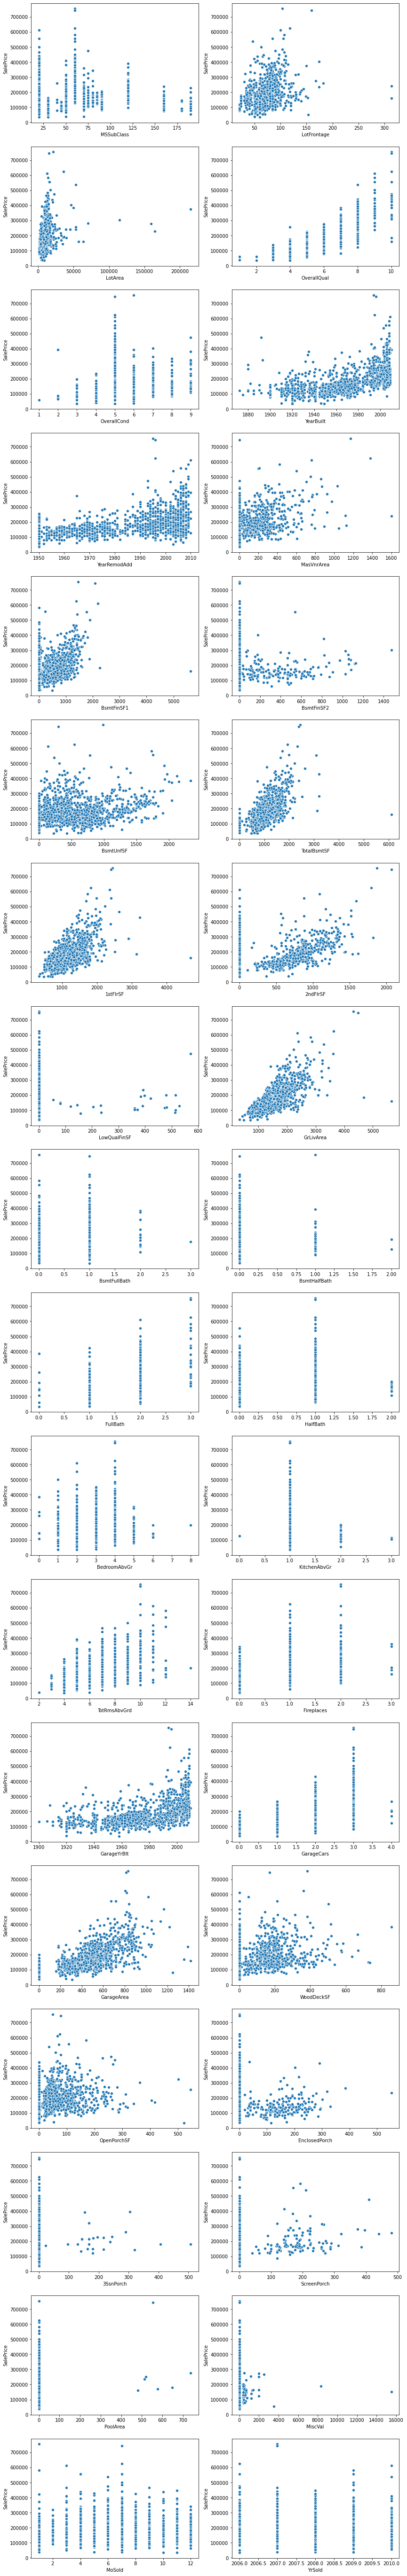

In [50]:
graph_numeric(df_train)

In [51]:
df.drop(df[(df['GrLivArea'] > 5000) & (df['SalePrice'] < 300000)].index, inplace=True)

<AxesSubplot:xlabel='SalePrice'>

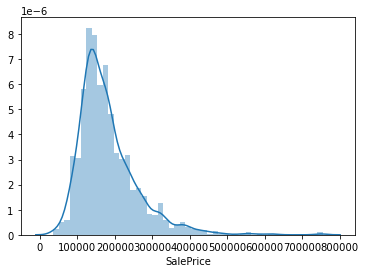

In [52]:
sns.distplot(df["SalePrice"])

In [53]:
df[["SalePrice"]] = np.log(df[["SalePrice"]] + 1)

<AxesSubplot:xlabel='SalePrice'>

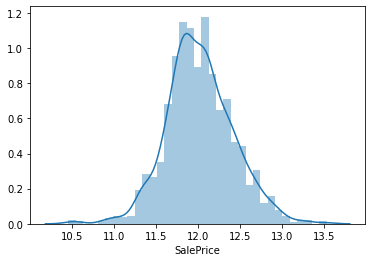

In [54]:
sns.distplot(df["SalePrice"])

In [55]:
df = pd.get_dummies(df)
df = feature_engineer(df)
df.shape

(2918, 319)

In [56]:
prices = df[["SalePrice"]]
df = pd.concat([fix_skew(df.drop('SalePrice', axis=1)), prices], axis=1)

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, ExtraTreesRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

num_train = df.shape[0] - df['SalePrice'].isnull().sum()
df_train = df[:num_train]
X_train = df_train.drop('SalePrice', axis=1)
Y_train =df_train['SalePrice']
df_test = df[num_train:]
X_test = df_test.drop('SalePrice', axis=1)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

## Ridge Regression

In [58]:
alphas = [11, 12, 13, 14, 15]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas, cv=kf))

print("rmse:", cv_rmse(ridge, X_train, Y_train, kf))
print("mean abs:", cv_abs(ridge, X_train, Y_train, kf))

ridge.fit(X_train, Y_train)

rmse: 0.11459967691315993
mean abs: 0.2764471016489166


Pipeline(steps=[('robustscaler', RobustScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([11, 12, 13, 14, 15]),
                         cv=KFold(n_splits=10, random_state=42, shuffle=True)))])

In [59]:
ridge[-1].alpha_

14

## Lasso Regression

In [43]:
alphas = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2]
lasso = make_pipeline(RobustScaler(), LassoCV(alphas=alphas, cv=kf))

print("rmse:", cv_rmse(lasso, X_train, Y_train, kf))
print("mean abs:", cv_abs(lasso, X_train, Y_train, kf))

lasso.fit(X_train, Y_train)
print(lasso[-1].alpha_)

rmse: 0.11483538119678645
mean abs: 0.2768755228061748
0.0005


In [44]:
lasso[-1].alpha_

0.0005

## Elastic Regression

In [48]:
alphas=[.0007, .00075, .0008, .00085, .0009, .00095, .001]
l1ratio=[.6, .61, .62, .63, .64, .65, .66]

elastic = make_pipeline(RobustScaler(), ElasticNetCV(alphas=alphas, cv=kf, l1_ratio=l1ratio))

print("rmse:", cv_rmse(elastic, X_train, Y_train, kf))
print("mean abs:", cv_abs(elastic, X_train, Y_train, kf))

elastic.fit(X_train, Y_train)
print(elastic[-1].alpha_)
print(elastic[-1].l1_ratio_)

rmse: 0.11373301377268633
mean abs: 0.2754023091936678
0.00095
0.61


## SVR

In [97]:
Cs = [90]
gammas = [.00008, .00007, .00006]
epsilons = [.007, .009, .011]

# for c in Cs:
#     for gamma in gammas:
#         for epsilon in epsilons:
#             svr = make_pipeline(RobustScaler(), SVR(C=c, gamma=gamma, epsilon=epsilon))
#             print(c, gamma, epsilon, ":", "rmse:", cv_rmse(svr, X_train, Y_train, kf))

svr = make_pipeline(RobustScaler(), SVR(C=90, gamma=6e-05, epsilon=0.009))
print("rmse:", cv_rmse(svr, X_train, Y_train, kf))
print("mean abs:", cv_abs(svr, X_train, Y_train, kf))
svr.fit(X_train, Y_train)

rmse: 0.1127164160911301
mean abs: 0.27032743487005106


Pipeline(steps=[('robustscaler', RobustScaler()),
                ('svr', SVR(C=90, epsilon=0.009, gamma=6e-05))])

## Lightgbm Regressor

In [146]:
# lgbm = LGBMRegressor(objective='regression', 
#                        num_leaves=6,
#                        learning_rate=0.01, 
#                        n_estimators=7000,
#                        max_bin=200, 
#                        bagging_fraction=0.8,
#                        bagging_freq=4, 
#                        bagging_seed=8,
#                        feature_fraction=0.2)

# lgbm = LGBMRegressor(objective='regression')



num_leaves = [5]
min_child_samples = [7,8,9]
for n in num_leaves:
    for mi in min_child_samples:
        lgbm = LGBMRegressor(objective='regression', num_leaves=n, min_child_samples=mi, 
                             learning_rate=0.01, n_estimators=2000)
        print(n, mi, "rmse:", cv_rmse(lgbm, X_train, Y_train, kf))


# print("rmse:", cv_rmse(lgbm, X_train, Y_train, kf))
# lgbm.fit(X_train, Y_train)
# print("training mse:", mean_squared_error(lgbm.predict(X_train), Y_train))

5 7 rmse: 0.12027378627296055
5 8 rmse: 0.12068946708477937
5 9 rmse: 0.12136977861690852


In [147]:
lgbm = LGBMRegressor(objective='regression', num_leaves=5, min_child_samples=7, 
                     learning_rate=0.01, n_estimators=2000)
print(n, mi, "rmse:", cv_rmse(lgbm, X_train, Y_train, kf))

5 9 rmse: 0.12027378627296055


### Stacking

In [148]:
estimators = [('elastic', elastic), ('svr', svr), ('ridge', ridge), ('lasso', lasso), ('lgbm', lgbm)]
stack = StackingRegressor(estimators=estimators, n_jobs=-1)

print(cv_rmse(stack, X_train, Y_train, kf))
stack.fit(X_train, Y_train)

0.11100401290793331


StackingRegressor(estimators=[('elastic',
                               Pipeline(steps=[('robustscaler', RobustScaler()),
                                               ('elasticnetcv',
                                                ElasticNetCV(alphas=[0.0007,
                                                                     0.00075,
                                                                     0.0008,
                                                                     0.00085,
                                                                     0.0009,
                                                                     0.00095,
                                                                     0.001],
                                                             cv=KFold(n_splits=10, random_state=42, shuffle=True),
                                                             l1_ratio=[0.6,
                                                                       0.61,
   

### Submission

In [121]:
submission = pd.read_csv("../HousePricePrediction/sample_submission.csv")

submission.iloc[:,1] = 0.4*np.expm1(stack.predict(X_test)) + 0.55*np.expm1(lgbm.predict(X_test)) + 0.05*np.expm1(ridge.predict(X_test)).reshape(1459)
submission.iloc[:,1] = np.expm1(stack.predict(X_test))
submission.to_csv("submission.csv", index=False)

In [22]:
myAnswer = pd.read_csv("../HousePricePrediction/submission.csv")
myAnswer.head()

,Id,SalePrice
0,1461,121728.920751
1,1462,158050.599120
2,1463,186422.965499
3,1464,197496.693336
4,1465,194729.015003


2010